## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 12 : Algoritma Densitas dan Asosiasi</div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Christopher Darren"
myNIM = "00000054804"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Christopher Darren
NIM: 		00000054804
Start: 		2023-05-12 20:11:21.187768
Device ID: 	7d214939-f0c6-11ed-8153-f02f74a116e8



---

### Dataset yang dipakai:

1. Car data – sumber : https://www.kaggle.com/datasets/athirags/car-data
2. Groceries dataset – sumber : https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

---

### Hasil kerja

## Density Algorithm : DBSCAN

#### 1. Importing the important library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN

C:\Users\Darren\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### 2.Define a function to generate clusters

In [3]:
def cluster_gen(n_clusters, pts_minmax=(10,100), x_mult=(1,4), y_mult=(1,3),
                x_off=(0, 50), y_off=(0,50)):
    
    # n_clusters = number of cluster to generate
    # pts_minmax = range of number of points per cluster
    # x_mult = range of multiplier to modify the size of cluster in the x_direction
    # y_mult = range of multiplier to modify the size of cluster in the y_direction
    # x_off = range of cluster positio offset in the x_direction
    # y_off = range of cluster position offset in the y_direction

    clusters_x = []
    clusters_y = []

    # Generate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0],x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0],y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)

    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)

    # Return cluster positions

    return clusters_x, clusters_y


#### 3. Generate some clusters

In [4]:
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)

#### 4. Convert to a single dataset in OpenCV format

In [5]:
data = np.float32((np.concatenate(clusters_x),
np.concatenate(clusters_y))).transpose()

#### 5. Define max_distance (eps parameter in DBSCAN)

In [6]:
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)

#### 6. Extract a mask of core cluster members

In [7]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

#### 7. Extract labels (-1 is used for outliers)

In [8]:
labels = db.labels_
n_clusters =len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

#### 8. Plot the result

<Axes: >

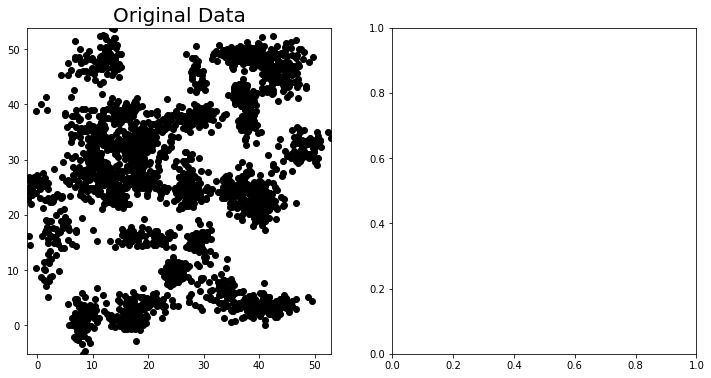

In [9]:
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:, 0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize =20)

plt.subplot(122)

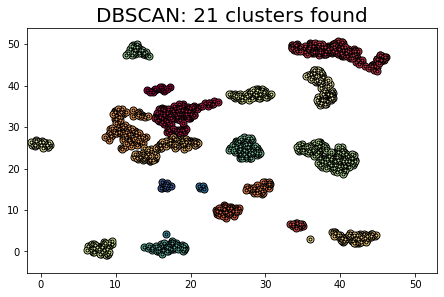

In [10]:
color = [plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]
for k, col in zip(unique_labels, color):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize =7)
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)


### Dataset Sendiri

#### 9. Import the important libraries

In [11]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### 10.Explore the data

In [12]:
df = pd.read_csv(r"D:\SEMESTER 4\IF540 Machine Learning\LAB\week11\cardata.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(301, 9)

In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

#### 11. Find insight between Petrol, Diesel , and CNG

<Axes: xlabel='Fuel_Type', ylabel='Kms_Driven'>

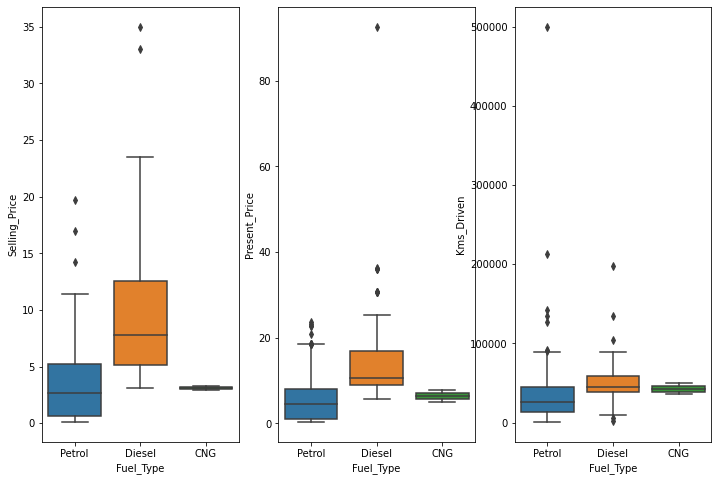

In [16]:
fig, axes = plt.subplots(1,3, figsize=(12,8))

sns.boxplot(x="Fuel_Type" , y="Selling_Price", data=df, orient='v', ax=axes[0])
sns.boxplot(x="Fuel_Type" , y="Present_Price", data=df, orient='v', ax=axes[1])
sns.boxplot(x="Fuel_Type" , y="Kms_Driven", data=df, orient='v', ax=axes[2])

#### 12. From graph above, looks like ‘Diesel’ present_price is the highest among the three of fuel type. Let’s focus on ‘Diesel’!

#### Grouping data with ‘diesel’

In [17]:
df_group_one = df[['Fuel_Type','Selling_Price','Present_Price','Kms_Driven']]
df_group_one.groupby(['Fuel_Type'], as_index=False).mean()

,Fuel_Type,Selling_Price,Present_Price,Kms_Driven
0,CNG,3.100000,6.415000,42749.000000
1,Diesel,10.278500,15.814500,50369.916667
2,Petrol,3.264184,5.583556,33528.937238


In [18]:
df_diesel = df[df['Fuel_Type'] == 'Diesel']
print(df_diesel.shape)
df_diesel.head()

(60, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0


In [19]:
Percentage = (df_diesel.shape[0]/df.shape[0])*100
print('Diesel Percentage: ', round(Percentage), '%')

Diesel Percentage:  20 %


### Compute DBSCAN

#### 13. We setting with a little so densy. Thus more noises will appear, but we can find a lot more insight with very sensitive result. We set the eps = 0.5 and min_samples = 4.

In [20]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_diesel[['Kms_Driven','Selling_Price','Present_Price']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=2).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_diesel['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

# A sample of clusters
print(df_diesel[['Kms_Driven','Selling_Price','Present_Price','Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Kms_Driven  Selling_Price  Present_Price  Clus_Db
1       43000           4.75           9.54        0
4       42450           4.60           6.87        0
5        2071           9.25           9.83        1
7       33429           6.50           8.61        0
8       20273           8.75           8.89        2
number of labels:  {0, 1, 2, 3, -1}


#### 14. Visualize the data : 

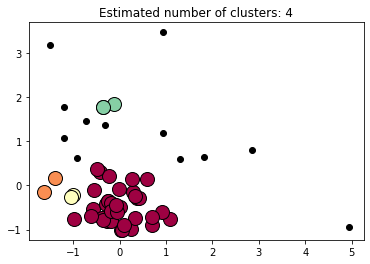

number of noise(s):  12


In [21]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
        for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)


In [22]:
for clust_number in set(labels):
    clust_set = df_diesel[df_diesel.Clus_Db == clust_number]
    if clust_number != -1:
        print("Cluster "+str(clust_number)+', Avg Selling_Price: '+ str(round(np.mean(clust_set.Selling_Price)))+\
            ', Avg Present_Price: '+ str(round(np.mean(clust_set['Present_Price'])))+\
            ', Avg Kms_Driven: '+str(round(np.mean(clust_set['Kms_Driven'])))+\
            ', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Selling_Price: 7, Avg Present_Price: 10, Avg Kms_Driven: 49598, Count: 41
Cluster 1, Avg Selling_Price: 10, Avg Present_Price: 11, Avg Kms_Driven: 5536, Count: 2
Cluster 2, Avg Selling_Price: 9, Avg Present_Price: 9, Avg Kms_Driven: 19854, Count: 2
Cluster 3, Avg Selling_Price: 23, Avg Present_Price: 32, Avg Kms_Driven: 42333, Count: 3


#### Conclusion :
With tightly setting, we found that “cluster 0 (average sellingprice : 7)” which highest average Kms_Driven. The second candidate is "Cluster 3 (average sellingprice: 23)" which 2nd highest Kms_Driven but more expensive average present_price. For some people who wants to buy cars especially second hand , they can buy at "Cluster 0" but make sure that the avg kms_driven car is being cared by the preview owner before buying it.

## Association Learning – Apriori Algorithm

#### 15. Importing apriori dataset

In [23]:
dataset = pd.read_csv(r"D:\SEMESTER 4\IF540 Machine Learning\LAB\week11\store_data.csv")
dataset.head(5)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
dataset.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [25]:
#fill missing values
df = dataset.fillna('', inplace= True)
df

In [26]:
food = []
for i in range(len(dataset)):
    food.append(dataset.values[i, :])

In [27]:
#checking null again
dataset.isnull().sum()

shrimp               0
almonds              0
avocado              0
vegetables mix       0
green grapes         0
whole weat flour     0
yams                 0
cottage cheese       0
energy drink         0
tomato juice         0
low fat yogurt       0
green tea            0
honey                0
salad                0
mineral water        0
salmon               0
antioxydant juice    0
frozen smoothie      0
spinach              0
olive oil            0
dtype: int64

#### 16. Transform the dataset into the right format via the TransactionEncoder :

In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(food).transform(food)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 17. Set the items and itemsets with at least 9% support :

In [29]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.09)

,support,itemsets
0,1.000000,(0)
1,0.163867,(26)
2,0.179733,(38)
3,0.170933,(44)
4,0.095333,(50)
5,0.132000,(55)
6,0.098267,(56)
7,0.129600,(72)
8,0.238267,(73)
9,0.095067,(83)


In [30]:
apriori(df, min_support=0.09, use_colnames=True)

,support,itemsets
0,1.000000,()
1,0.163867,(chocolate)
2,0.179733,(eggs)
3,0.170933,(french fries)
4,0.095333,(frozen vegetables)
5,0.132000,(green tea)
6,0.098267,(ground beef)
7,0.129600,(milk)
8,0.238267,(mineral water)
9,0.095067,(pancakes)


#### 18. Filter result for the dataset

In [31]:
frequent_itemsets = apriori(df, min_support=0.09, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,1.000000,(),1
1,0.163867,(chocolate),1
2,0.179733,(eggs),1
3,0.170933,(french fries),1
4,0.095333,(frozen vegetables),1
5,0.132000,(green tea),1
6,0.098267,(ground beef),1
7,0.129600,(milk),1
8,0.238267,(mineral water),1
9,0.095067,(pancakes),1


#### 19. Than we can select the results that satisfy our desired criteria as follows :

In [32]:
frequent_itemsets[  (frequent_itemsets['length'] == 2) &
                    (frequent_itemsets['support'] >= 0.08)]

,support,itemsets,length
11,0.163867,"(, chocolate)",2
12,0.179733,"(, eggs)",2
13,0.170933,"(, french fries)",2
14,0.095333,"(, frozen vegetables)",2
15,0.132000,"(, green tea)",2
16,0.098267,"(, ground beef)",2
17,0.129600,"(, milk)",2
18,0.238267,"(, mineral water)",2
19,0.095067,"(, pancakes)",2
20,0.174133,"(, spaghetti)",2


#### 20. Similarly, we can select entries based on the itemsets.

In [33]:
frequent_itemsets[  frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
1,0.163867,(chocolate),1


## Association Learning – FP Growth Algorithm

#### 21. Using the same dataset, we import the important libraries with at least 9% support

In [34]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.09)

,support,itemsets
0,1.000000,(0)
1,0.179733,(38)
2,0.238267,(73)
3,0.132000,(55)
4,0.129600,(72)
5,0.170933,(44)
6,0.174133,(101)
7,0.095333,(50)
8,0.163867,(26)
9,0.095067,(83)


#### 22. By default, fpgrowth returns the columns indices of the items which may be useful in downstream operations such as association rule mining.

In [35]:
fpgrowth(df, min_support=0.09, use_colnames=True)

,support,itemsets
0,1.000000,()
1,0.179733,(eggs)
2,0.238267,(mineral water)
3,0.132000,(green tea)
4,0.129600,(milk)
5,0.170933,(french fries)
6,0.174133,(spaghetti)
7,0.095333,(frozen vegetables)
8,0.163867,(chocolate)
9,0.095067,(pancakes)


#### 23. Apriori Vs FP Growth

In [36]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(food).transform(food)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [37]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(df, min_support=0.09)

6.26 ms ± 294 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [38]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.09)

37.8 ms ± 699 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Pada saat mengenerate DBSCAN sendiri, dengan menggunakan n_cluster sebanyak 50 titik data, maka pada hasil spectral data sebenarnya terdapat 24 cluster yang berbeda beda, dengan menggunakan visualisasi juga bisa membantu untuk membedakan cluster apa saja yang ada pada data tersebut.
    - DBSCAn merupakan sebuah algoritma yang density based dalam artian bahwa algoritma ini melihat kepadatan data dalam suatu cluster. untuk hasil car data dataset pada DBSCAN saya mengset minimal cluster adalah 2 dan eps. 0.5 hasilnya mengeluarkan 4 cluster yang distribusinya beda beda.
    - Apriori merupakan sebuah algoritma yang melihat frekuensi dari item item pada sebuah transaksi yang biasanya terjadi pada retail store. pada kasus ini saya mengambil dataset grocery store dan melakukan apriori dengan support 9%. hasilnya bisa dilihat diatas.
    - Pada bagian Apriori vs FPgrowth pada dataset groceries, kecepatan dalam mengolah data lebih cepat pada metode apriori dibandingkan FPgrowth

---

In [39]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Christopher Darren
NIM: 		00000054804
Time-stamp:	2023-05-16 10:28:44.900568


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [ ]:
!jupyter nbconvert --to html "./IF540_Kelas EL_00000054804_Christopher Darren_Week11.ipynb" --output-dir="./"